In [106]:
# imports
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [107]:
class TextClassification:
    def __init__(self, text, category):
        self.text = text
        self.category = category     

In [108]:
import csv

textClassifications = []

with open('docs_stage_3_preprocessed.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        textClassifications.append(TextClassification(row[2], row[20]))

print(f"{textClassifications[100].text} {textClassifications[750].category}")
        

ebber deny worldcom fraud worldcom chief bernie_ebbers deny claim know accountant doctor book firm speak court mr_ebbers reject allegation pressure ex chief financial officer scott_sullivan falsify company financial statement mr sullivan accounting decision tell federal court say finance chief keen command number mr ebbers deny charge fraud conspiracy second day questioning new_york trial mr_ebbers play work relationship mr sullivan deny frequently meet discuss company business question prosecution lot week speak time mr_ebbers say add conversation finance rarely usually discuss group people instead mr ebbers relationship mr sullivan key case surround financial corruption lead collapse firm 2002 follow discovery $ 11bn accounting fraud prosecution star witness mr_sullivan worldcom executive indict case plead guilty fraud appear prosecution witness agreement prosecutor time witness stand mr sullivan repeatedly tell juror meet frequently mr_ebbers tell change worldcom account hide cost w

In [109]:
from sklearn.model_selection import train_test_split

# textClassifications = textClassifications[0: 1000]
training, test = train_test_split(textClassifications, test_size=0.5)
print(len(training))

struct = {}
for x in training:
    struct[x.category] = True

print(struct.keys())

1103
dict_keys(['Business', 'Tech', 'Politics', 'Sport', 'Entertainment', 'DocType'])


In [110]:
train_x = [x.text for x in training]
train_y = [x.category for x in training]

test_x = [x.text for x in test]
test_y = [x.category for x in test]

In [111]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = "word", 
                             lowercase=True, 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 5000)
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)


In [112]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_x_vectors, train_y)

test_x[0]


'ask jeeves join web log market ask_jeeves buy bloglines website improve way handle content web journal blog bloglines site hugely popular give user place read search share blog interested ask jeeves say plan change bloglines use 300 million article archive round index web ask jeeves pay bloglines reveal bloglines popular let user build list blog want follow have visit journal site individually make use technology know really_simple_syndication rss blog adopt let site know new entry journal acquisition follow similar move search site google acquire pyra_labs maker blogger software 2003 2004 msn introduce blog system yahoo tweak technology well job handle blog entry jim_lanzone vice president search property ask_jeeves say acquire bloglines foothold blog publish world say ask jeeves interested help people find information look help write universe reader vastly large universe writer say mr lanzone say acquisition sit ask jeeves service let people customise web experience build personal c

In [113]:
clf_svm.predict(test_x_vectors)

array(['Tech', 'Business', 'Politics', ..., 'Business', 'Entertainment',
       'Business'], dtype='<U13')

In [114]:
from sklearn.naive_bayes import MultinomialNB

MNBclf = MultinomialNB()
MNBclf.fit(train_x_vectors, train_y)

MultinomialNB()

In [115]:
MNBclf.predict(test_x_vectors[0])

array(['Tech'], dtype='<U13')

In [116]:
print(clf_svm.score(test_x_vectors, test_y))
print(MNBclf.score(test_x_vectors, test_y))

0.970081595648232
0.9682683590208522


In [127]:
# F1 Score
from sklearn.metrics import f1_score

labels = ['Sport', 'Entertainment', 'Politics', 'Business', 'Tech']

f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=labels)
f1_score(test_y, MNBclf.predict(test_x_vectors), average=None, labels=labels) 

array([0.99190283, 0.96829971, 0.96018735, 0.96309963, 0.95454545])

['Tech' 'Business' 'Politics' ... 'Business' 'Entertainment' 'Business']


<Axes: >

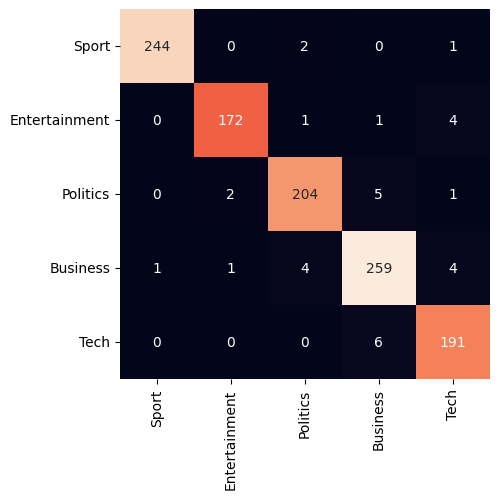

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

y_pred = clf_svm.predict(test_x_vectors)
print(y_pred)

cm = confusion_matrix(test_y, y_pred, labels=labels)

sn.heatmap(cm.T,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)